In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Housing.csv')#Use Your Own Path
print("\nMissing values in each column:")
print(data.isnull().sum())


# Features and Target
X = data.drop('price', axis=1)
y = data['price']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing: One-Hot Encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)



Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [10]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.70
Root Mean Squared Error (RMSE): 1324506.96
R² Score: 0.65


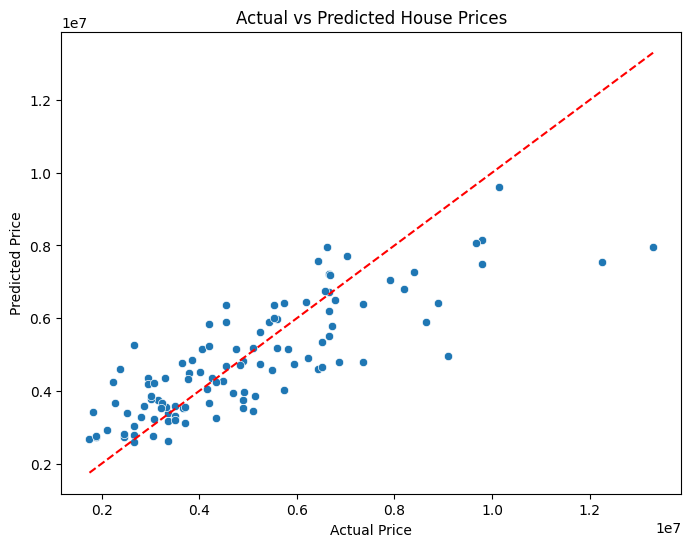

In [12]:
# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [13]:
# Extract feature names after one-hot encoding
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
# Combine with numeric columns
all_features = list(feature_names)

# Extract coefficients
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficient
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
print(coef_df)

                                 Feature   Coefficient
10                  remainder__bathrooms  1.094445e+06
4               cat__airconditioning_yes  7.914267e+05
3               cat__hotwaterheating_yes  6.846499e+05
5                      cat__prefarea_yes  6.298906e+05
7      cat__furnishingstatus_unfurnished -4.136451e+05
11                    remainder__stories  4.074766e+05
2                      cat__basement_yes  3.902512e+05
0                      cat__mainroad_yes  3.679199e+05
1                     cat__guestroom_yes  2.316100e+05
12                    remainder__parking  2.248419e+05
6   cat__furnishingstatus_semi-furnished -1.268818e+05
9                    remainder__bedrooms  7.677870e+04
8                        remainder__area  2.359688e+02
